In [22]:
import pandas as pd
from sklearn.utils import resample

# Carregar os dados
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 1. Análise quantitativa e relativa de Survived em relação ao Sex
survived_sex_counts = train_df.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
survived_sex_percent = survived_sex_counts.div(survived_sex_counts.sum(axis=1), axis=0) * 100

print("Contagem absoluta de sobreviventes por sexo:")
print(survived_sex_counts)
print("\nPercentual de sobreviventes por sexo:")
print(survived_sex_percent)

Contagem absoluta de sobreviventes por sexo:
Survived    0    1
Sex               
female     81  233
male      468  109

Percentual de sobreviventes por sexo:
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


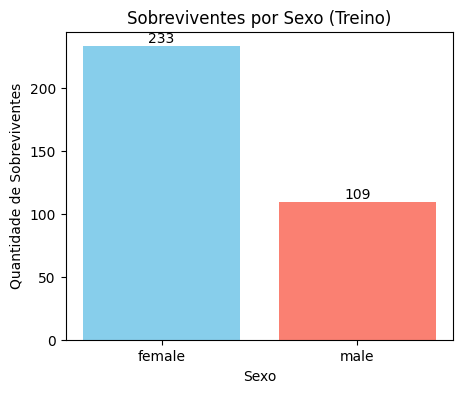

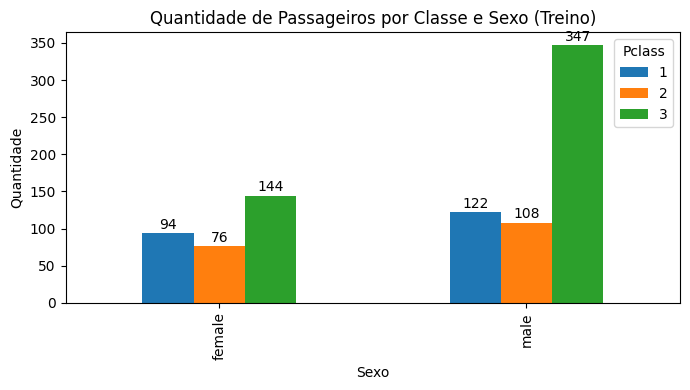

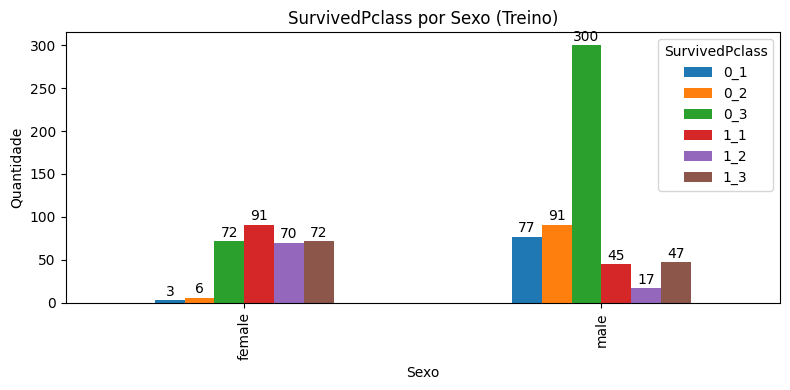

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

survived_by_sex = train.groupby('Sex')['Survived'].sum()

fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(survived_by_sex.index, survived_by_sex.values, color=['skyblue', 'salmon'])
ax.set_title('Sobreviventes por Sexo (Treino)')
ax.set_ylabel('Quantidade de Sobreviventes')
ax.set_xlabel('Sexo')
ax.bar_label(bars, padding=1)
plt.show()

# Criar tabela cruzada
ct = pd.crosstab(train['Sex'], train['Pclass'])

fig, ax = plt.subplots(figsize=(7,4))
bars = ct.plot(kind='bar', ax=ax)  # Não usar stacked=True

plt.title('Quantidade de Passageiros por Classe e Sexo (Treino)')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')

# Adicionar rótulos de dados em cada barra
for container in ax.containers:
    ax.bar_label(container, padding=1)

plt.legend(title='Pclass')
plt.tight_layout()
plt.show()

# 3. Criar a nova classe combinada SurvivedPclass
train['SurvivedPclass'] = train['Survived'].astype(str) + '_' + train['Pclass'].astype(str)

ct = pd.crosstab(train['Sex'], train['SurvivedPclass'])

fig, ax = plt.subplots(figsize=(8,4))
bars = ct.plot(kind='bar', ax=ax)  # Não usar stacked=True

plt.title('SurvivedPclass por Sexo (Treino)')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')

# Adicionar rótulos de dados em cada barra
for container in ax.containers:
    ax.bar_label(container, padding=1)

plt.legend(title='SurvivedPclass')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Reduzir viés e desbalanceamento das classes usando SurvivedPclass
train_df['SurvivedPclass'] = train_df['Survived'].astype(str) + '_' + train_df['Pclass'].astype(str)

# Balancear as classes SurvivedPclass x Sex
train_df['SurvivedPclassSex'] = train_df['SurvivedPclass'] + '_' + train_df['Sex']

max_size = train_df['SurvivedPclassSex'].value_counts().max()
lst = [train_df]
for class_index, group in train_df.groupby('SurvivedPclassSex'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))
train_balanced = pd.concat(lst)

print("\nDistribuição após balanceamento (SurvivedPclass x Sex):")
print(train_balanced['SurvivedPclassSex'].value_counts())

# Separar features e target
X = train_balanced.drop(['Survived', 'SurvivedPclass', 'SurvivedPclassSex'], axis=1)
y = train_balanced['Survived']